In [1]:
import sys

sys.path.append('../_util')
sys.path.append('../data')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 200)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/DATA_Customer-Churn.csv')
data[data == ' '] = float("NaN")
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='ignore')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='ignore')
data.fillna((data.mean()), inplace=True, )

In [3]:
features_df = data[['tenure', 'SeniorCitizen', 'TotalCharges', 'MonthlyCharges']]

target_df = data['Churn']
target_df_dummies = pd.get_dummies(target_df, drop_first=True)

x_df = data.copy()
x_df.drop(['Churn'], axis=1, inplace=True)
numerical_features_df = x_df.select_dtypes(include=np.number)
categorical_features_df = x_df.select_dtypes(include=object)

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df_dummies, test_size=.30, random_state=123)
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Knn

In [5]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

,Error_metric,Train,Test
0,Accuracy,0.863083,0.735447
1,Precision,0.782772,0.533623
2,Recall,0.653636,0.416949


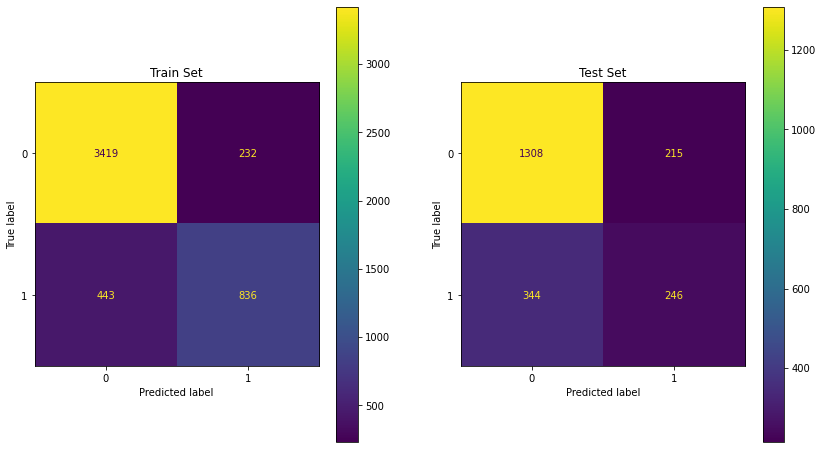

In [6]:
y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))

plot_confusion_matrix(model, X_train, y_train, ax=ax[0], values_format='d')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model, X_test, y_test, ax=ax[1], values_format='d')
ax[1].title.set_text("Test Set")

# _________________________________Decision trees

,Error_metric,Train,Test
0,Accuracy,0.863083,0.735447
1,Precision,0.782772,0.533623
2,Recall,0.653636,0.416949


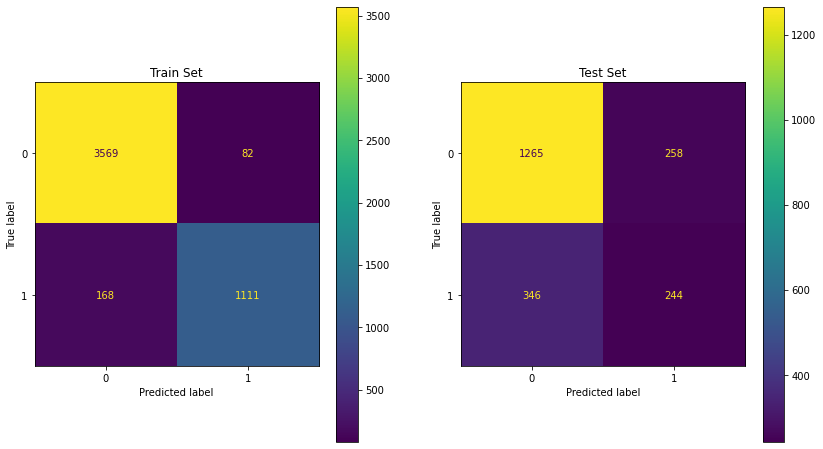

In [7]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

display(performance_df)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
plot_confusion_matrix(model, X_train, y_train, ax=ax[0], values_format='d')
ax[0].title.set_text("Train Set")
plot_confusion_matrix(model, X_test, y_test, ax=ax[1], values_format='d')
ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

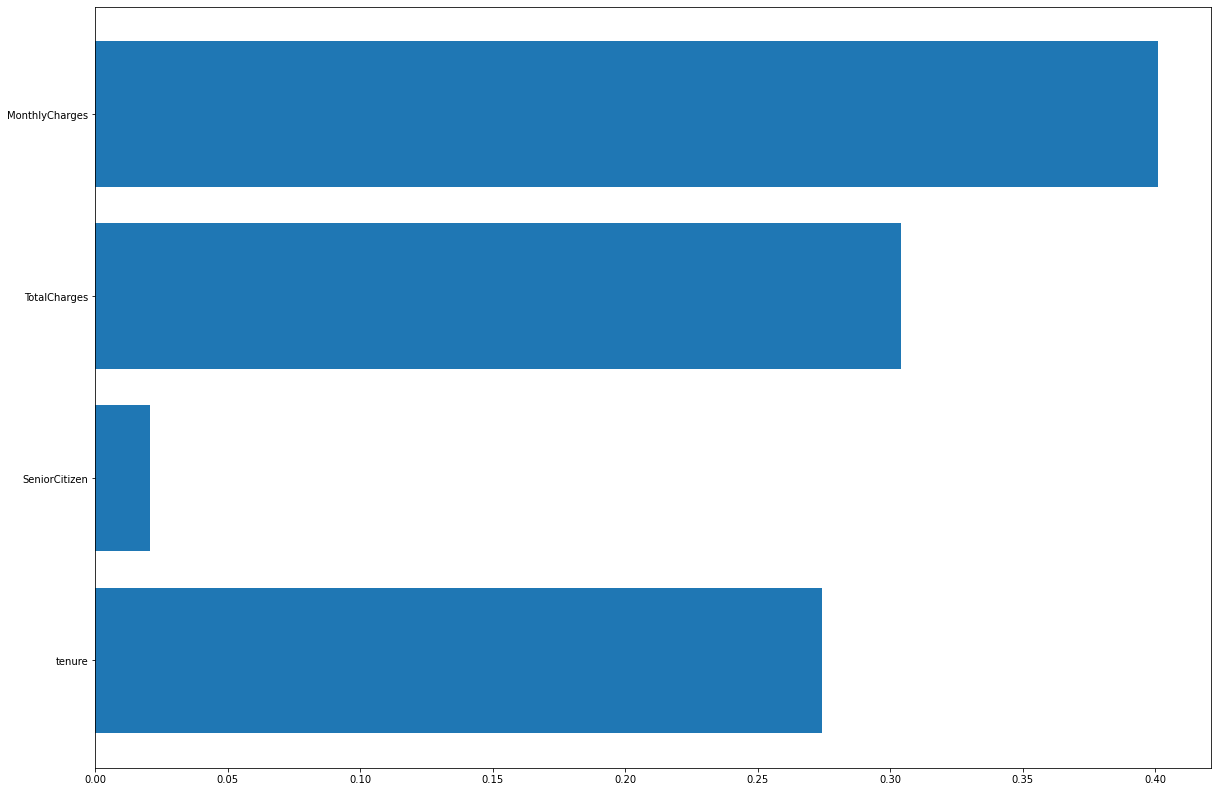

In [8]:
plt.figure(figsize=(20, 14))
plt.barh(features_df.columns, model.feature_importances_)

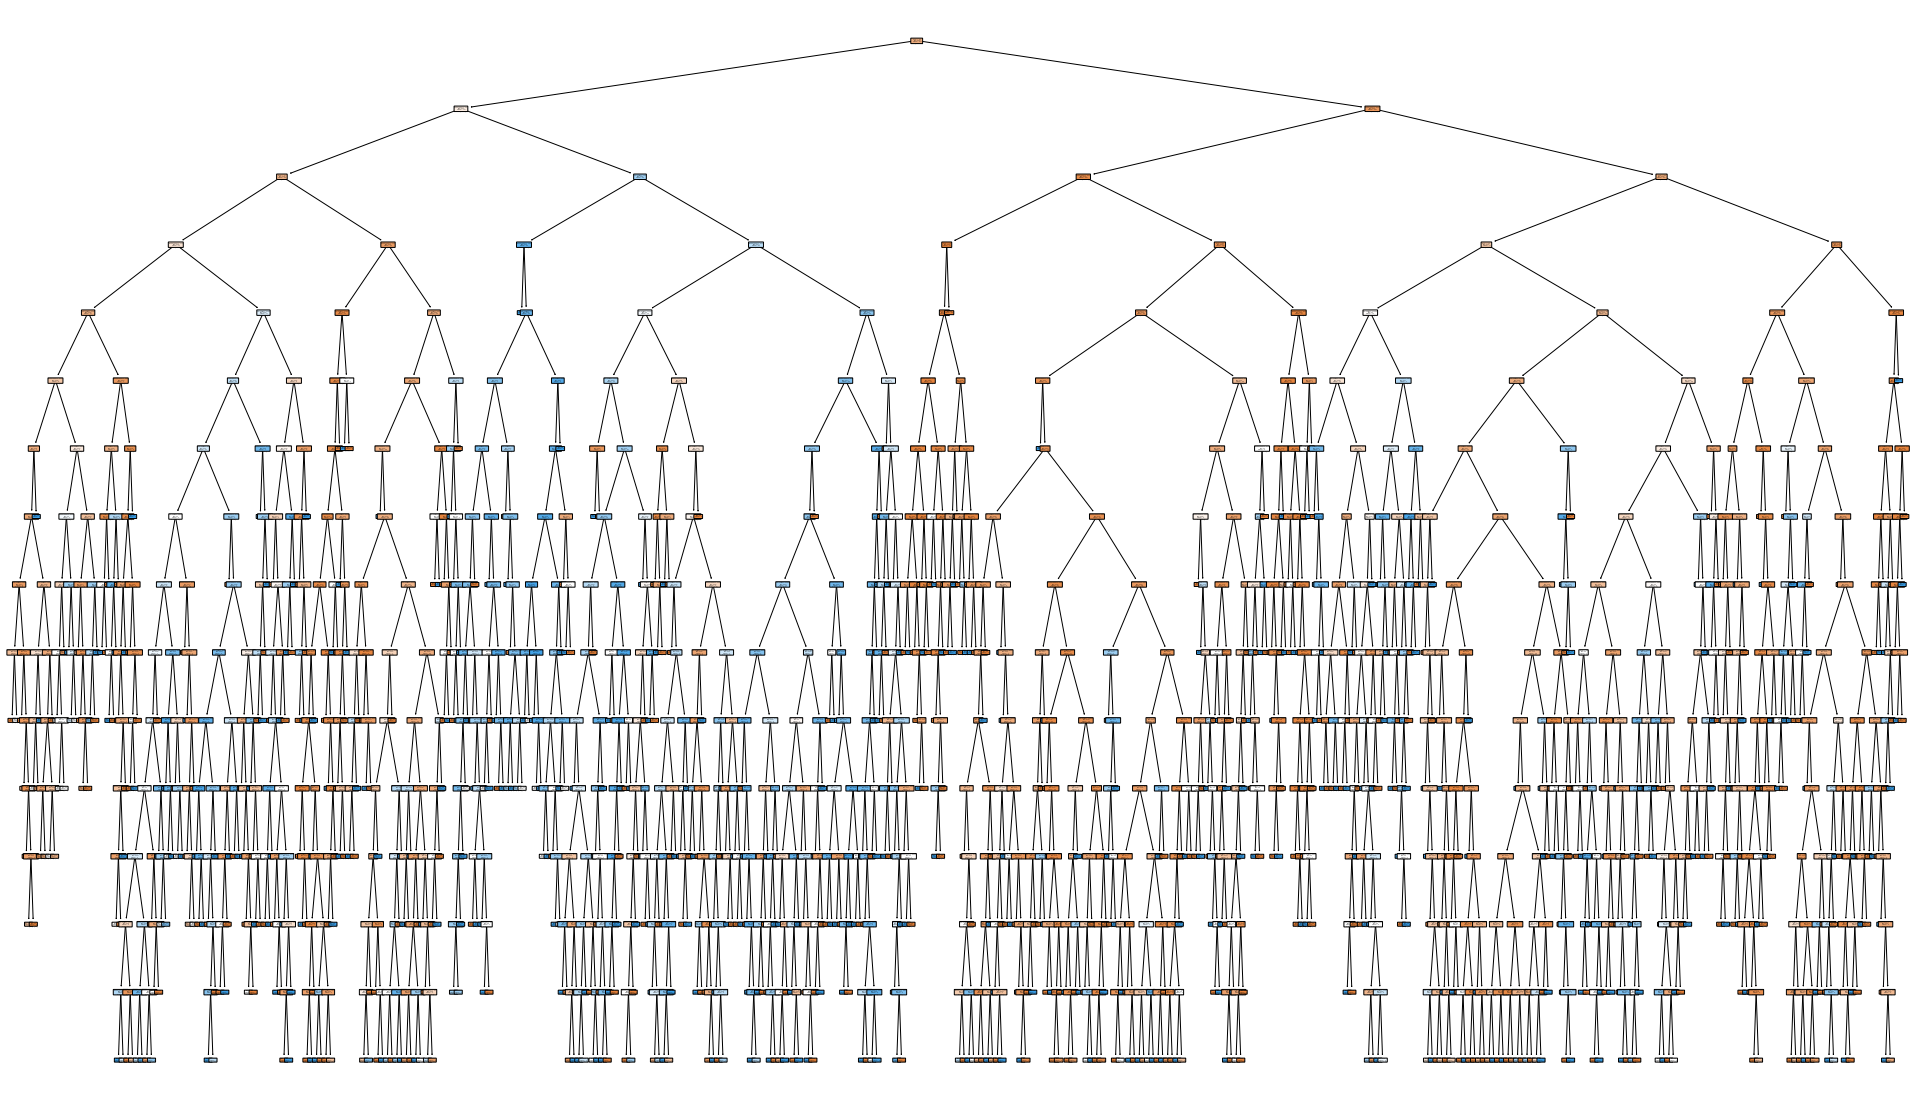

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(34, 20))

plot_tree(model, filled=True, rounded=True, feature_names=features_df.columns)
plt.show()

# cross validation

In [10]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print(X_train.shape)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(4930, 4)
-0.46602938630482615
0.9705518820201164


In [11]:
scores = cross_val_score(model, X_train, y_train, cv=5
                         )
scores

array([-0.51743227, -0.31152987, -0.4468218 , -0.55950696, -0.37360443])

In [12]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.44 accuracy with a standard deviation of 0.09


In [13]:
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
mo = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(150, 4)
(150,)
0.8945518453427065
1.0


In [14]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.94630872, 0.92      , 0.83275261, 1.        , 0.93939394])

In [15]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([1., 2., 1., 2., 2., 1., 2., 1., 0., 0., 0., 0., 2., 2., 1., 1., 0.,
       1., 1., 2., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.])

In [16]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i = 0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i + 1

print(scores)

{'Regression Tree': 0.9276910554933145, 'Linear Regression': 0.9176953509605358, 'KNN': 0.951436458096769}


# RandomForest

getting all column as x

In [17]:
encoder = OneHotEncoder(drop='first').fit(categorical_features_df)
encoded_categorical = encoder.transform(categorical_features_df).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numerical_features_df, encoded_categorical], axis=1)

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



In [19]:
# target_df = data['Churn']
category_0_base = data[data['Churn'] == 'No']
category_1_base = data[data['Churn'] == 'Yes']

category_0 = category_0_base.select_dtypes(include=np.number)
category_1 = category_1_base.select_dtypes(include=np.number)

category_0

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
3,0,45,42.30,1840.75
6,0,22,89.10,1949.40
7,0,10,29.75,301.90
...,...,...,...,...
7037,0,72,21.15,1419.40
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45


# down scaling

In [20]:
category_0_down = category_0.sample(len(category_1))

In [21]:
data = pd.concat([category_0_down, category_1], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

KeyError: 'Churn'

# Upsampling Method 1

In [ ]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

In [ ]:
data = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()